# Comparing Catchement Land Surface Model Restart Files

This Jupyter notebook contains a Python script that compares two sets of restart files for a hydrological model. The script loads the restart files from two different directories, and then compares the variables in the files to determine if they are equal.

The script uses the `xarray` library, which is commonly used for working with multi-dimensional arrays and datasets. It first imports the `xarray` library using the `import` statement:

```python
import xarray as xr 

In [62]:
# Define directory paths and filenames

# Paths to directories containing the restart files
# path1 = '/discover/nobackup/amfox/Experiments/OLv7_M36_ascat/OLv7_M36_ascat/output/SMAP_EASEv2_M36_GLOBAL/rs/ens0001/Y2015/M06'
# path2 = '/discover/nobackup/amfox/Experiments/OLv7_M36/OLv7_M36/output/SMAP_EASEv2_M36_GLOBAL/rs/ens0001/Y2015/M06'
path1 = '../test_data/restarts'
path2 = '../test_data/restarts'

# Name of the restart files
file1 = 'OLv7_M36_ascat.catch_internal_rst.20140901_0000'
file2 = 'OLv7_M36.catch_internal_rst.20140901_0000'

In [63]:
# Import libraries and define functions

import xarray as xr

def compare_restart_files_old(path1, path2, file1, file2):
    # Load the restart files
    ds1 = xr.open_dataset(path1+'/'+file1, engine='netcdf4')
    ds2 = xr.open_dataset(path2+'/'+file2, engine='netcdf4')

    # Check that the dimensions of the files are the same
    if ds1.dims != ds2.dims:
        raise ValueError('The dimensions of the two files are not the same')

    # Determine the number and name of the variables in the files
    print('ds1: ', ds1.data_vars)
    print('ds2: ', ds2.data_vars)

    # Determine the number and name of the dimensions in the files
    print('ds1: ', ds1.dims)
    print('ds2: ', ds2.dims)

    # Determine the number of variables in the files
    print('ds1: ', len(ds1.data_vars))
    print('ds2: ', len(ds2.data_vars))

    # Loop over all the variables in the files, and compare them, printing their names and whether they are equal
    for var in ds1.data_vars:
        print(var, ds1[var].equals(ds2[var]))

    # Loop over all the variables in the files, printing their names and the mean difference between them
    for var in ds1.data_vars:
        print(f"{var} = {float((ds1[var]-ds2[var]).mean())}")# Cell 3: Call the compare_restart_files function

    # Loop over the selected variables in the files, printing their names and the mean difference between them
    for var in ['CAPAC', 'CATDEF', 'CDCR1', 'GHTCNT1']:
        print(f"{var} = {float((ds1[var]-ds2[var]).mean())}")

In [64]:
import xarray as xr
import numpy as np

def compare_selected_variables_old(path1, path2, file1, file2, tol=1e-6):
    # Load the restart files
    ds1 = xr.open_dataset(path1+'/'+file1, engine='netcdf4')
    ds2 = xr.open_dataset(path2+'/'+file2, engine='netcdf4')

    # Check that the dimensions of the files are the same
    if ds1.dims != ds2.dims:
        raise ValueError('The dimensions of the two files are not the same')

    # Determine the number and name of the variables in the files
    print('ds1: ', ds1.data_vars)
    print('ds2: ', ds2.data_vars)

    # Determine the number and name of the dimensions in the files
    print('ds1: ', ds1.dims)
    print('ds2: ', ds2.dims)

    # Determine the number of variables in the files
    print('ds1: ', len(ds1.data_vars))
    print('ds2: ', len(ds2.data_vars))

    # Loop over the selected variables in the files, and compare them, printing their names and whether they are equal
    for var in ['CAPAC', 'CATDEF', 'CDCR1', 'GHTCNT1']:
        if ds1[var].equals(ds2[var]):
            print(f"{var} = 0.0")
        else:
            diff = (ds1[var] - ds2[var]).values
            abs_diff = np.abs(diff)
            if np.all(abs_diff < tol):
                print(f"{var} = {float((ds1[var]-ds2[var]).mean())} (within tolerance)")
            else:
                print(f"{var} = {float((ds1[var]-ds2[var]).mean())} (not within tolerance)")

    # Loop over the selected variables in the files, printing their names and the mean difference between them
    for var in ['CAPAC', 'CATDEF', 'CDCR1', 'GHTCNT1']:
        print(f"{var} = {float((ds1[var]-ds2[var]).mean())}")

In [65]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

def compare_selected_variables(path1, path2, file1, file2):
    # Load the datasets
    ds1 = xr.open_dataset(path1+'/'+file1, engine='netcdf4')
    ds2 = xr.open_dataset(path2+'/'+file2, engine='netcdf4')

    # Check that the dimensions of the datasets are the same
    if ds1.dims != ds2.dims:
        raise ValueError('The dimensions of the two datasets are not the same')

    # Determine the selected variables in the datasets
    variables = ['CAPAC', 'CATDEF', 'CDCR1', 'CDCR2', 'GHTCNT1', 'GHTCNT2', 'GHTCNT3', 'GHTCNT4', 'GHTCNT5', 'GHTCNT6',
                 'HTSNNN1', 'HTSNNN2', 'HTSNNN3', 'RZEXC', 'SNDZN1', 'SNDZN2', 'SNDZN3', 'SRFEXC', 'WESNN1', 'WESNN2',
                 'WESNN3', 'QC', 'TC']
    variables = [var for var in variables if var in ds1.data_vars and var in ds2.data_vars]

    # Loop over the selected variables in the datasets, and calculate the mean absolute difference, maximum difference, and RMSE
    mean_abs_diffs = []
    max_abs_diffs = []
    rmses = []
    plot_variables = []
    for var in variables:
        if 'subtile' in ds1[var].dims and 'subtile' in ds2[var].dims:
            for i in range(4):
                diff = ds1[var].isel(subtile=i) - ds2[var].isel(subtile=i)
                abs_diff = np.abs(diff)
                mean_abs_diff = abs_diff.mean().values
                mean_abs_diffs.append(mean_abs_diff)
                max_abs_diff = abs_diff.max().values
                max_abs_diffs.append(max_abs_diff)
                rmse = np.sqrt((diff**2).mean().values)
                rmses.append(rmse)
                plot_variables.append(f"{var} subtile {i}")

        else:
            diff = ds1[var] - ds2[var]
            abs_diff = np.abs(diff)
            mean_abs_diff = abs_diff.mean().values
            mean_abs_diffs.append(mean_abs_diff)
            max_abs_diff = abs_diff.max().values
            max_abs_diffs.append(max_abs_diff)
            rmse = np.sqrt((diff**2).mean().values)
            rmses.append(rmse)
            plot_variables.append(var)
    
    # Create a bar plot of the mean absolute difference for the selected variables
    plt.figure(figsize=(12, 8))
    plt.bar(plot_variables, mean_abs_diffs)
    plt.xlabel('Variable')
    plt.ylabel('Mean absolute difference')
    plt.title('Mean absolute difference between datasets')
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.show()

    # Create a bar plot of the maximum absolute difference for the selected variables
    plt.figure(figsize=(12, 8))
    plt.bar(plot_variables, max_abs_diffs)
    plt.xlabel('Variable')
    plt.ylabel('Maximum absolute difference')
    plt.title('Maximum absolute difference between datasets')
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.show()

    # Create a bar plot of the RMSE for the selected variables
    plt.figure(figsize=(12, 8))
    plt.bar(plot_variables, rmses)
    plt.xlabel('Variable')
    plt.ylabel('RMSE')
    plt.title('RMSE between datasets')
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.show()

    # Print the mean absolute difference, maximum absolute difference, and RMSE for each variable
    for i, var in enumerate(plot_variables):
        print(f"{i+1}. {var}:")
        print(f"   Mean absolute difference: {mean_abs_diffs[i]:.4e}")
        print(f"   Maximum absolute difference: {max_abs_diffs[i]:.4e}")
        print(f"   RMSE: {rmses[i]:.4e}")

/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_58337/3059439042.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(plot_variables, rotation=90)
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_58337/3059439042.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(plot_variables, rotation=90)
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_58337/3059439042.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(plot_variables, rotation=90)


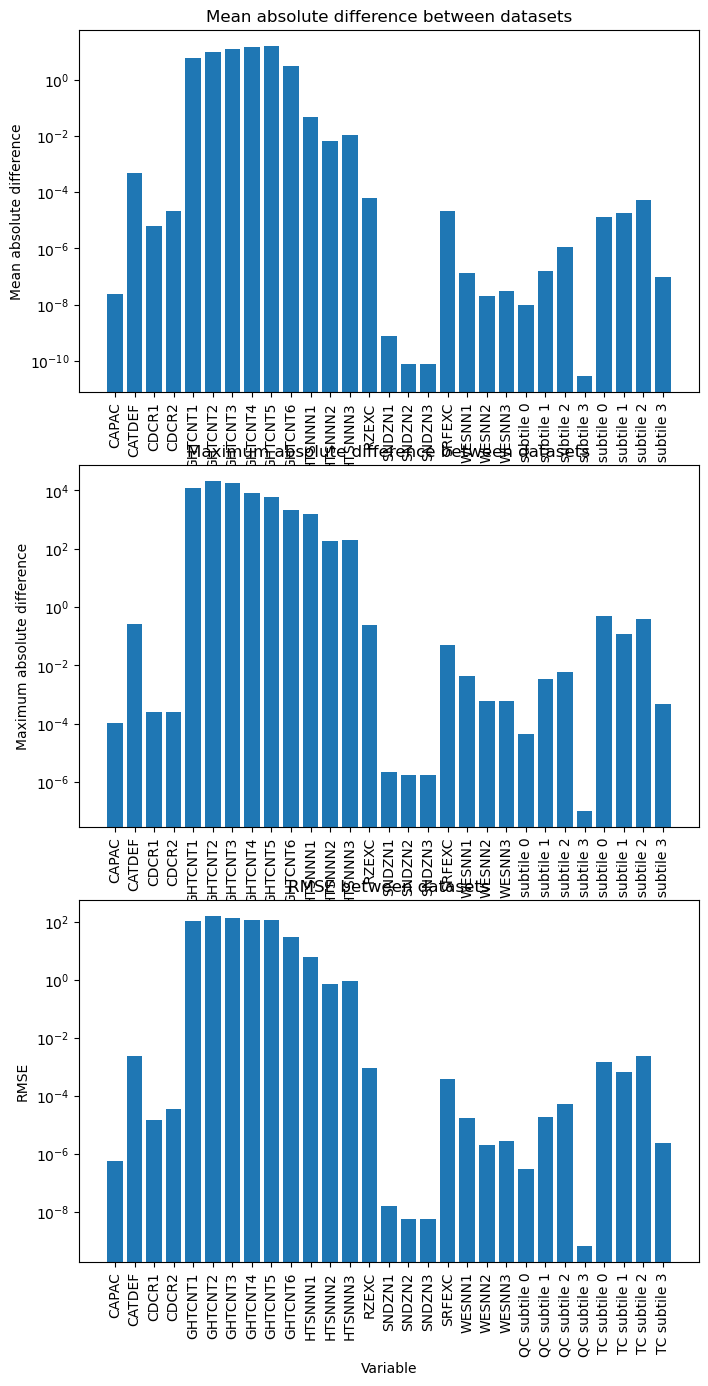

1. CAPAC:
   Mean absolute difference: 2.3504e-08
   Maximum absolute difference: 1.0238e-04
   RMSE: 5.5743e-07
2. CATDEF:
   Mean absolute difference: 4.7720e-04
   Maximum absolute difference: 2.5718e-01
   RMSE: 2.4395e-03
3. CDCR1:
   Mean absolute difference: 6.2409e-06
   Maximum absolute difference: 2.4414e-04
   RMSE: 1.4791e-05
4. CDCR2:
   Mean absolute difference: 2.0731e-05
   Maximum absolute difference: 2.4414e-04
   RMSE: 3.7185e-05
5. GHTCNT1:
   Mean absolute difference: 5.8101e+00
   Maximum absolute difference: 1.1751e+04
   RMSE: 1.1435e+02
6. GHTCNT2:
   Mean absolute difference: 9.9487e+00
   Maximum absolute difference: 2.0730e+04
   RMSE: 1.6283e+02
7. GHTCNT3:
   Mean absolute difference: 1.2581e+01
   Maximum absolute difference: 1.8162e+04
   RMSE: 1.3888e+02
8. GHTCNT4:
   Mean absolute difference: 1.5103e+01
   Maximum absolute difference: 8.0720e+03
   RMSE: 1.1855e+02
9. GHTCNT5:
   Mean absolute difference: 1.5506e+01
   Maximum absolute difference: 5.7

In [66]:
# Call the compare_restart_files function

compare_selected_variables(path1, path2, file1, file2)